In [1]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

## References
http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.0020095
https://people.ece.cornell.edu/atang/pub/15/PLOS_One.pdf

# Load Global network of 277 neurons (zip) dataset from [[kraiser et al. 2006]](http://www.biological-networks.org/pubs/suppl/Kaiser2006.html)

In [6]:
nodes_labels = pd.read_csv("celegans277labels.csv", header=None) 
adjacency = pd.read_csv("celegans277matrix.csv", header=None)
locations = pd.read_csv("celegans277positions.csv", header=None)
adjacency.index = nodes_labels[0] 
adjacency.columns = nodes_labels[0]
locations.index = nodes_labels[0]
inter_neuron_dist = pd.DataFrame(pairwise_distances(locations))
inter_neuron_dist.columns = nodes_labels[0]
inter_neuron_dist.index = nodes_labels[0]

In [7]:
inter_neuron_dist.head()

,ADAL,ADAR,ADEL,ADER,ADFL,ADFR,ADLL,ADLR,AFDL,AFDR,...,VD12,VD13,VD2,VD3,VD4,VD5,VD6,VD7,VD8,VD9
0,,,,,,,,,,,,,,,,,,,,,
ADAL,0.000000,3.605551,3.316625,3.464102,3.000000,3.741657,3.000000,3.000000,2.645751,3.000000,...,3.741657,3.162278,4.472136,4.795832,4.582576,4.000000,4.123106,4.000000,3.872983,3.741657
ADAR,3.605551,0.000000,3.162278,3.605551,3.162278,3.605551,3.162278,2.828427,3.162278,3.162278,...,3.872983,3.316625,4.582576,4.898979,4.690416,4.123106,4.242641,4.123106,4.000000,3.872983
ADEL,3.316625,3.162278,0.000000,2.645751,2.828427,3.605551,2.828427,2.828427,2.828427,2.828427,...,3.605551,3.000000,4.358899,4.690416,4.472136,3.872983,4.000000,3.872983,3.741657,3.605551
ADER,3.464102,3.605551,2.645751,0.000000,3.000000,3.741657,3.000000,3.000000,3.000000,3.000000,...,3.741657,2.828427,4.472136,4.795832,4.582576,4.000000,4.123106,4.000000,3.872983,3.741657
ADFL,3.000000,3.162278,2.828427,3.000000,0.000000,3.316625,2.449490,2.449490,2.449490,2.449490,...,3.316625,2.645751,4.123106,4.472136,4.242641,3.605551,3.741657,3.605551,3.464102,3.316625


In [8]:
locations.head()

,0,1
0,,
ADAL,0.011068,0.005903
ADAR,0.014206,0.002204
ADEL,0.016233,0.005657
ADER,0.014941,0.009308
ADFL,0.082393,-0.000984


In [9]:
adjacency.head()

,ADAL,ADAR,ADEL,ADER,ADFL,ADFR,ADLL,ADLR,AFDL,AFDR,...,VD12,VD13,VD2,VD3,VD4,VD5,VD6,VD7,VD8,VD9
0,,,,,,,,,,,,,,,,,,,,,
ADAL,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADAR,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADEL,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADFL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Plot network

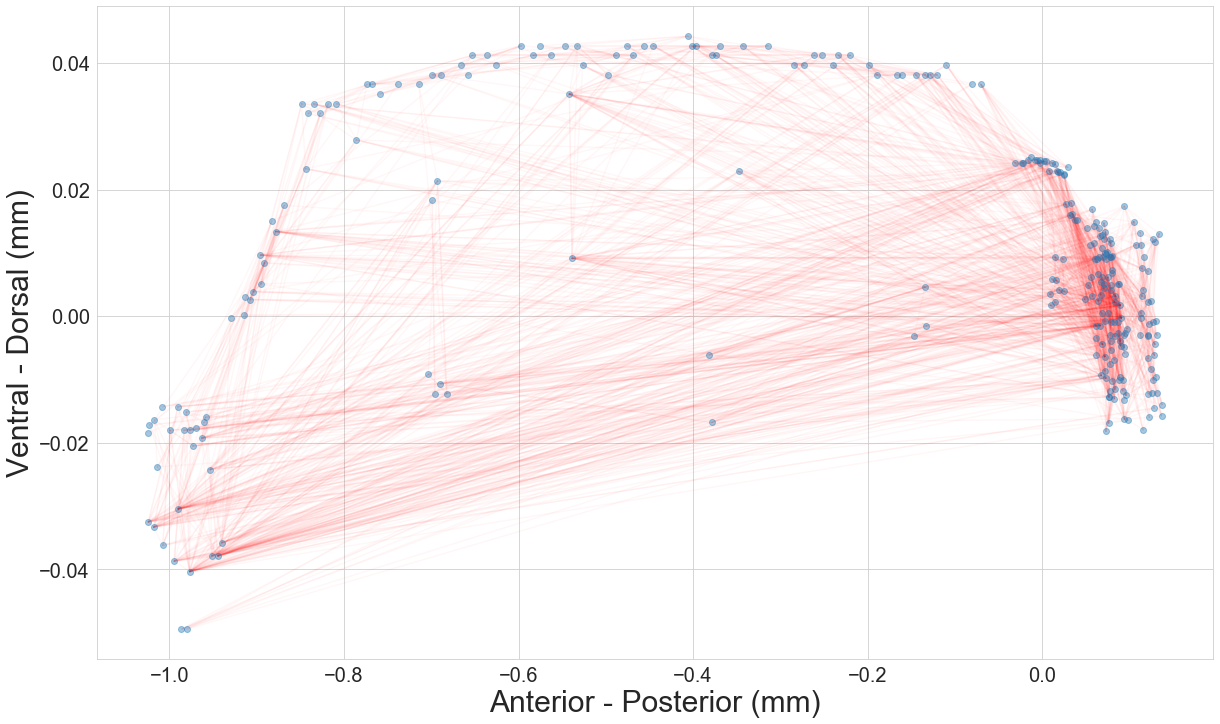

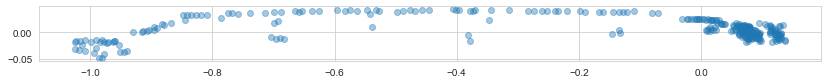

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,12))
for i,row in enumerate(adjacency.values):
    for j,columns in enumerate(row):
        if columns == 1:
            xs = [locations.values[i,0],locations.values[j,0]]
            ys = [locations.values[i,1],locations.values[j,1]]
            plt.plot(xs,ys,color="red",alpha=0.03)
plt.plot(locations.values[:,0],locations.values[:,1],"o",alpha=0.4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Anterior - Posterior (mm)",fontsize=30)
plt.ylabel("Ventral - Dorsal (mm)",fontsize=30)
plt.savefig("connectome.pdf")
plt.figure(figsize=(14,1))
plt.plot(locations.values[:,0],locations.values[:,1],"o",alpha=0.4)
plt.savefig("connectome_scale.pdf")

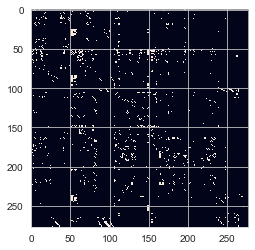

In [11]:
plt.imshow(adjacency)

Pas de symétrie, peu de point blancs $\to$ matrice creuse

In [12]:
in_degree = adjacency.sum(axis=0)

In [13]:
out_degree = adjacency.sum(axis=1)

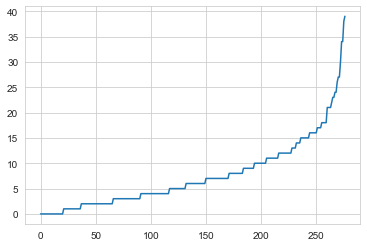

In [14]:
plt.plot(np.sort(in_degree))

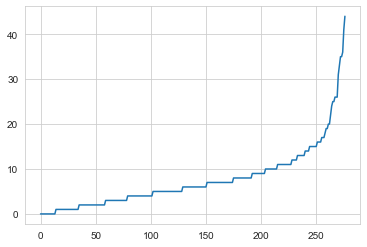

In [15]:
plt.plot(np.sort(out_degree))

(array([102.,  90.,  48.,  18.,   5.,   7.,   0.,   4.,   1.,   2.]),
 array([ 0. ,  4.4,  8.8, 13.2, 17.6, 22. , 26.4, 30.8, 35.2, 39.6, 44. ]),
 <a list of 10 Patch objects>)

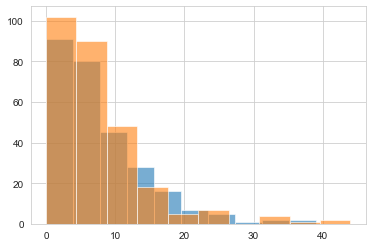

In [16]:
plt.hist(in_degree, alpha=0.6) #blue
plt.hist(out_degree, alpha=0.6) #orange

# Networkx

In [17]:
import networkx as nx

In [18]:
link_list=[]
for row in adjacency.index:
    for col in adjacency.columns:
        if adjacency.loc[row,col]!=0:
            link_list.append([row,col, inter_neuron_dist.loc[row,col]])
len(link_list)

2105

In [19]:
df = pd.DataFrame(link_list, columns=["input", "output", "weight"])
df

,input,output,weight
0,ADAL,ADEL,3.316625
1,ADAL,ADFL,3.000000
2,ADAL,AIAL,4.242641
3,ADAL,AWAL,2.449490
4,ADAL,PVPL,3.316625
...,...,...,...
2100,VD9,DB6,2.828427
2101,VD9,DB7,3.464102
2102,VD9,DD5,3.162278
2103,VD9,VA9,3.316625


/Users/sergiopeignier/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


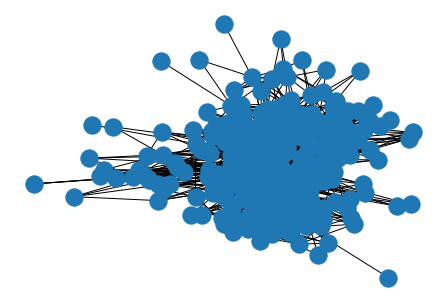

In [20]:
g = nx.from_pandas_edgelist(df, "input", "output", "weight")
nx.draw(g)

/Users/sergiopeignier/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


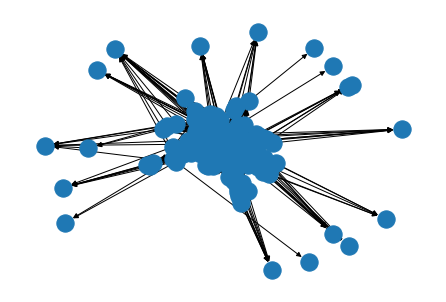

In [21]:
g2 = nx.from_pandas_edgelist(df, "input", "output", "weight", create_using=nx.DiGraph())
nx.draw(g2)

In [24]:
g2.nodes() #nodes

NodeView(('ADAL', 'ADEL', 'ADFL', 'AIAL', 'AWAL', 'PVPL', 'RMGL', 'ADAR', 'ADER', 'ADFR', 'AIAR', 'ASHR', 'RICR', 'RIMR', 'RMGR', 'BDUL', 'BDUR', 'FLPL', 'IL2L', 'AVAR', 'AVM', 'FLPR', 'IL2R', 'AIZL', 'ASHL', 'AWBL', 'AIYR', 'ASEL', 'AVHL', 'AWAR', 'AWBR', 'PVPR', 'RIH', 'ADLL', 'AVAL', 'CEPVL', 'SDQR', 'ADLR', 'AVHR', 'AWCR', 'AFDL', 'AINR', 'ASER', 'AFDR', 'AINL', 'AIML', 'ASGL', 'ASKL', 'AWCL', 'HSNL', 'PVQL', 'AIMR', 'AIZR', 'ASGR', 'ASIR', 'ASKR', 'PVQR', 'AIBR', 'DVB', 'DVC', 'HSNR', 'RIBL', 'RMFR', 'SAADR', 'SDQL', 'VB1', 'AUAR', 'ASIL', 'DVA', 'RIGL', 'RIR', 'RIGR', 'ALA', 'ALML', 'RIFL', 'ALMR', 'ALNL', 'ALNR', 'AQR', 'PVCR', 'AS1', 'AVBL', 'AVBR', 'AVDL', 'AVDR', 'AVEL', 'AVER', 'AVL', 'DB1', 'PVCL', 'AS10', 'DB7', 'AS11', 'VA12', 'AS2', 'AS3', 'DB2', 'VD2', 'VD3', 'AS4', 'DB3', 'AS5', 'DB4', 'AS6', 'AS7', 'DB5', 'AS8', 'AS9', 'DB6', 'CEPVR', 'RIFR', 'ASJL', 'ASJR', 'AUAL', 'BAGR', 'IL2DL', 'URXL', 'URXR', 'AVG', 'AVJL', 'LUAL', 'LUAR', 'PHBL', 'PHBR', 'PHCL', 'PLMR', 'PQR', 

In [25]:
g2.edges() #edges

OutEdgeView([('ADAL', 'ADEL'), ('ADAL', 'ADFL'), ('ADAL', 'AIAL'), ('ADAL', 'AWAL'), ('ADAL', 'PVPL'), ('ADAL', 'RMGL'), ('ADEL', 'ADER'), ('ADEL', 'BDUL'), ('ADEL', 'BDUR'), ('ADEL', 'FLPL'), ('ADEL', 'IL2L'), ('ADFL', 'AIZL'), ('ADFL', 'ASHL'), ('ADFL', 'AWBL'), ('AIAL', 'ADLL'), ('AIAL', 'AIML'), ('AIAL', 'AINR'), ('AIAL', 'AIZL'), ('AIAL', 'ASEL'), ('AIAL', 'ASER'), ('AIAL', 'ASGL'), ('AIAL', 'ASHL'), ('AIAL', 'ASKL'), ('AIAL', 'AWCL'), ('AIAL', 'HSNL'), ('AIAL', 'PVQL'), ('PVPL', 'AQR'), ('PVPL', 'AVG'), ('PVPL', 'AVHR'), ('PVPL', 'AVKR'), ('PVPL', 'RIFL'), ('RMGL', 'ADEL'), ('RMGL', 'ALML'), ('RMGL', 'CEPDL'), ('RMGL', 'PVQL'), ('RMGL', 'RMHR'), ('RMGL', 'SAADL'), ('RMGL', 'SAADR'), ('ADAR', 'ADER'), ('ADAR', 'ADFR'), ('ADAR', 'AIAR'), ('ADAR', 'ASHR'), ('ADAR', 'RICR'), ('ADAR', 'RIMR'), ('ADAR', 'RMGR'), ('ADER', 'AVAR'), ('ADER', 'AVM'), ('ADER', 'BDUR'), ('ADER', 'FLPL'), ('ADER', 'FLPR'), ('ADER', 'IL2R'), ('ADFR', 'AIYR'), ('ADFR', 'ASEL'), ('ADFR', 'ASHR'), ('ADFR', 'AVHL'

In [26]:
list(g2.neighbors("ADAL")) #neigbors of a given node

['ADEL', 'ADFL', 'AIAL', 'AWAL', 'PVPL', 'RMGL']

In [27]:
g2.get_edge_data("ADAL", "ADFL") #edges weight between two given nodes

{'weight': 3.0}

# Network motifs

### Definition
A network motif can be defined as a subgraph (ie. small patterns of interconnections) that repeat itself in a given graph.
They are occurring in complex networks at numbers that are significantly higher than those in randomized networks.

### Most important motifs in this dataset


feed forward loop, bi-fan, bi-parallel

### Roles

###  Algorithms

Feed forward loop

In [47]:
def feed_forward(g):
    res = 0
    for n in g.nodes():
        for i in g.neighbors(n):
            for j in g.neighbors(i):
                if j in g.neighbors(n):
                    res += 1
    return res

In [45]:
def feed_forward(g):
    res = 0
    for n in g.nodes():
        n1 =  list(g.neighbors(n))
        for i in n1:
            n2 = list(g.neighbors(i))
            res += len(set(n2).intersection(set(n1)))
    return res

In [48]:
feed_forward(g2)

3776

Ici, on recherche le pattern mais pas de manière exclusive, ie on ne se préoccupe pas du fait que les noeuds du pattern peuvent être connectés à d autre noeuds

Bi-fan loop

In [68]:
from scipy.special import binom
def bi_fan(g):
    counts = 0
    nodes = list(g.nodes())
    for i,n1 in enumerate(nodes):
        for n2 in nodes[i+1:]:
            neighbors_n1 = set(list(g.neighbors(n1))).difference([n1,n2])
            neighbors_n2 = set(list(g.neighbors(n2))).difference([n1,n2])
            nb_common_neighbors = len(neighbors_n1.intersection(neighbors_n2))
            counts += binom(nb_common_neighbors,2)
    return(counts)

In [65]:
def bi_fan(g):
    res = 0
    i = 0
    j = 0
    nodes = list(g.nodes())
    for i,n1 in enumerate(nodes): #(ie a on figure 6)
        neighbors_n1 = list(g.neighbors(n1))
        for n2 in nodes[i+1:]: #(ie c on figure 6)
            neighbors_n2 = list(g.neighbors(n2))
            for j,v1 in enumerate(neighbors_n1): #(ie b on figure 6)
                for v2 in neighbors_n1[j+1:]: #(ie d on figure 6)
                    if ((v1 in neighbors_n2) and (v2 in neighbors_n2)):
                        res += 1
            
    return res

In [69]:
bi_fan(g2)

14232.0

In [93]:
def bi_parallel(g):
    counts = 0
    nodes = list(g.nodes())
    for n1 in nodes:
        for n2 in nodes:
            if n1 != n2:
                children_n1 = set(g.successors(n1)).difference([n1,n2])
                parents_n2 = set(g.predecessors(n2)).difference([n1,n2])
                nb_common_parents_children = len(children_n1.intersection(parents_n2))
                counts += binom(nb_common_parents_children,2)
    return(counts)

In [91]:
def bi_parallel(g):
    res = 0
    i = 0
    for n in g.nodes(): # (ie a on figure 6)
        neighbors_n = list(g.neighbors(n))
        for i,v1 in enumerate(neighbors_n): #(ie b on figure 6)
            for v2 in neighbors_n[i+1:]: #(ie c on figure 6)
                for w in list(g.neighbors(v1)):
                    if w in list(g.neighbors(v2)):
                        if w != v1 and w != v2 and w != n:
                            res += 1
    return res             

In [94]:
bi_parallel(g2)

17827.0

# Rich Club Neurons